## **<div align="center">College Basketball Above or Below .500 Prediction</div>**
##### **<div align="center">Adam White, Brady Keeley</div>**
##### **<div align="center">CPSC 322, Fall 2022</div>**

### **<div align="center">Dataset Description**</div>
<div align="center">

[Data Source](https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset) 

Format: csv

The dataset we decided to use for our project is a college basketball dataset from 2013-2019. The dataset has everywhere from basic attributes such as games won and games played, to very advanced statistics such as two-point-percentage allowed and adjusted defensive efficiency. The dataset is highly usable, with no noisy or incomplete data.

#### **Attributes**

In total, there are 24 attributes, however, we are planning on using 13 of those attributes. The attribute that we are planning on trying to predict is whether or not a team will be above a .500 win percentage. This attribute is not explicitly in the dataset, however, we are planning on calculating the win percentage for each team ourselves, then making a new column that will store a boolean value on if the team was above .500 or not. In the future, we way drop the games and games win columns altogether once we have this column, but for now, we are going to keep it in. The attributes we plan on using to calculate if a team would be above or below .500 or not are... 

1. Adjusted Offensive Efficiency (ADJOE)
1. Adjusted Defensive Efficiency (ADJDE)
1. Power Rating (BARTHAG)
1. Effective Field Goal Percentage (EFG_O)
1. Turn-Over Percentage Allowed (TOR)
1. Offensive Rebounding Rate (ORB)
1. Free Throw Rate (FTR)
1. Two-Point Percentage (2P_O)
1. Three-Point Percentage (3P_O)

For a total of 9 attributes. The rest of the attributes that we are not planning on predicting are simply there to label each of the rows. For example, we are leaving in team name and year, so we can go back and see where certain values may have come from.</div>


### **<div align="center"> Findings </div>**
<div align="center">
Findings here

</div>


In [57]:
# some useful mysklearn package import statements and reloads
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

#uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

# uncomment once you paste your myclassifiers.py into mysklearn package
import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

In [58]:
games_played = MyPyTable()
games_played.load_from_file("input_data/CBB_data_cleaned.csv")
print(games_played.column_names)

games_played_idx = games_played.column_names.index('G')
games_won_idx = games_played.column_names.index('W')
games_played.column_names.append("OVER_.500")

print(games_played_idx)
print(games_won_idx)
print(games_played.column_names)

for team in games_played.data:
    win_percentage = team[games_won_idx] / team[games_played_idx]
    if win_percentage >= .500:
        team.append("TRUE")
    else:
        team.append("FALSE")


['TEAM', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'TOR', 'ORB', 'FTR', '2P_O', '3P_O', 'YEAR']
1
2
['TEAM', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'TOR', 'ORB', 'FTR', '2P_O', '3P_O', 'YEAR', 'OVER_.500']


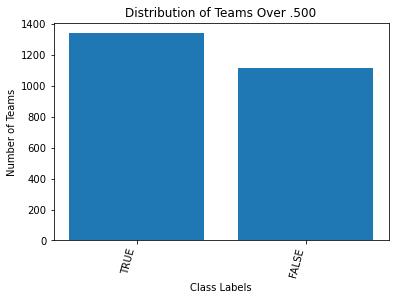

In [59]:
class_labes = myutils.get_column(games_played.data, -1)

values = [] 
counts = [] 
for value in class_labes:
    if value not in values:
        values.append(value)
        counts.append(1)
    else:
        counts[values.index(value)] += 1

myutils.bar_chart(values, counts, "Class Labels", "Number of Teams", values, "Distribution of Teams Over .500")

## Discretizing DataSet Below
A = Above League Average
B = Below League Average

In [60]:
importlib.reload(myutils)
for col_index, col_name in enumerate(games_played.column_names[2:12]):
    col_average = myutils.find_col_average(games_played, col_name)
    col_index += 2
    curr_col = games_played.get_column(col_name)
    for i, val in enumerate(curr_col):
        if val > col_average:
            games_played.data[i][col_index] = "A"
        else:
            games_played.data[i][col_index] = "B"

games_played.save_to_file("input_data/CBB_data_discretized.csv")

## **kNN Preliminary Analysis**

In [61]:
X = [value[2:12] for value in games_played.data]
y = [value[-1] for value in games_played.data]

#knn_clf = MyKNeighborsClassifier(3)
#y_true, y_predicted = myutils.cross_val_predict(X, y, 3, True, knn_clf)
#myutils.measure_classifier_performance(y_true, y_predicted, "kNN Classifier", 1, ['TRUE', "FALSE"], "TRUE")

## **Naive Bayes Preliminary Results**

In [62]:
importlib.reload(myutils)
X = [value[2:12] for value in games_played.data]
y = [value[-1] for value in games_played.data]
nb_clf = MyNaiveBayesClassifier()
nb_folds = myevaluation.stratified_kfold_split(X, y, 3)
nb_true, nb_predicted = myutils.do_fold_predictions(X, y, nb_folds, nb_clf, "Naive Bayes")
myutils.measure_classifier_performance(nb_true, nb_predicted, "Naive Bayes Classifier", 2, ['TRUE', "FALSE"], "TRUE")

STEP 2: Naive Bayes Classifier
k=10 Stratified K-Fold Cross Validation
ACCURACY: 0.6762
ERROR RATE: 0.3238

PRECISION SCORE: 0.6377
RECALL SCORE: 0.9395
F1 SCORE: 0.7597

MATRIX:
[[1257, 81], [714, 403]]


## **Decision Tree Preliminary Results**

In [63]:
tree_clf = MyDecisionTreeClassifier()
tree_true, tree_predicted = myutils.cross_val_predict(X, y, 3, True, tree_clf)
myutils.measure_classifier_performance(tree_true, tree_predicted, "Decision Tree", 3, ['TRUE', "FALSE"], "TRUE")


STEP 3: Decision Tree
k=10 Stratified K-Fold Cross Validation
ACCURACY: 0.9173
ERROR RATE: 0.0827

PRECISION SCORE: 0.9588
RECALL SCORE: 0.8864
F1 SCORE: 0.9212

MATRIX:
[[1186, 152], [51, 1066]]


## **Random Forest**

In [68]:
importlib.reload(mysklearn.myclassifiers)
importlib.reload(myutils)

random_forest = mysklearn.myclassifiers.MyRandomForestClassifier(20, 7, 2)
random_forest.fit(X, y)